# Homework 9.2

### Frequency of Violin Sound

In this experiment, I used the audio spectrum sensor from phyphox (https://phyphox.org/) to study the frequency of a music note from a real violin. I used the sound from this video: https://www.youtube.com/watch?v=j0FynYzQvcM&ab_channel=XaviMorat%C3%B3

The sound in the video is A note (not "a" note, but A note, as in A, B, C, D, E, F, G notes in music, hopefully this clears the confusion a bit). Each note in music corresponds to a certain vibrational frequency in a particular musical instrument. In this case, A note in violin correponds to the violin string vibrating at around 440 Hz. I'm not a musician, but it could be more complicated in reality, since it is not just the string that is vibrating, the whole violin is vibrating, and of course the sound we hear is actually due to the vibration in the air. But we can stick with the naive view that 440Hz is the frequency at which the violin string is vibrating.

I will import the raw data from the audio sensor, that is the sound amplitude (dB) VS time (s):


In [10]:
# This is to enable linting, making sure we write our python code in style.
%load_ext pycodestyle_magic
%pycodestyle_on

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [11]:
import matplotlib.pyplot as plt

from fft import fft as fft
import numpy as np
import math

In [12]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [45]:
# I have written a python code to read the data
# It's called read_violin.py
# I had to put the original phyphox data in a txt file first
# Then I use this python code to read the data
from read_violin import read_violin

In [14]:
x, y = read_violin('Violin_A.txt')

In [15]:
# Let's see if the data is imported
# x should be the time data
x

array([0.00000000e+00, 2.08333000e-05, 4.16667000e-05, ...,
       1.70604167e-01, 1.70625000e-01, 1.70645833e-01])

In [16]:
# y should be the acceleration data
y

array([-0.00434078, -0.00254996, -0.00021282, ..., -0.00127515,
        0.00051121,  0.00188713])

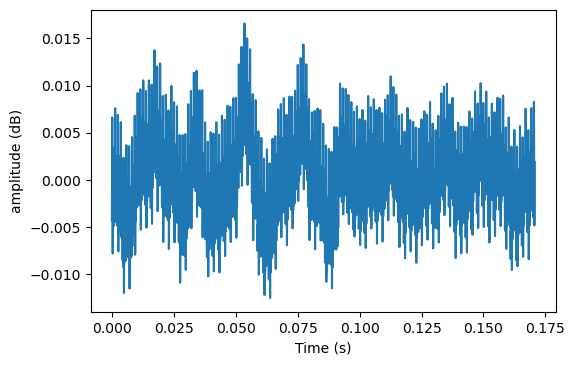

In [17]:
f1 = plt.figure(1)
plt.plot(x, y)
plt.ylabel('amplitude (dB)')
plt.xlabel('Time (s)')
plt.show()

The data is imported correctly. Next we will perform a fourier transform to study the frequencies in this sound.

In [47]:
# Since I plan to use fast Fourier transform
# I have to truncate the number of our data points to multiples of 2
y = y[0:2048]
x = x[0:2048]

In [50]:
# Simply using the fast Fourier transform function in numpy
# Keep the absolute values, because somehow we can get complex values.

Y = fft(y)

Y_abs = abs(Y)

The Fourier transform is easily carried out with numpy. Next, the correct x-axis has to be generated, since we're moving from the time domain to the frequency domain. To generate the correct x-axis, we can use a function from numpy called numpy.fft.fftfreq. https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html.

In [51]:
# The arguments are (number of data point, sample spacing)
freq = np.fft.fftfreq(2048, 2.08333E-05)

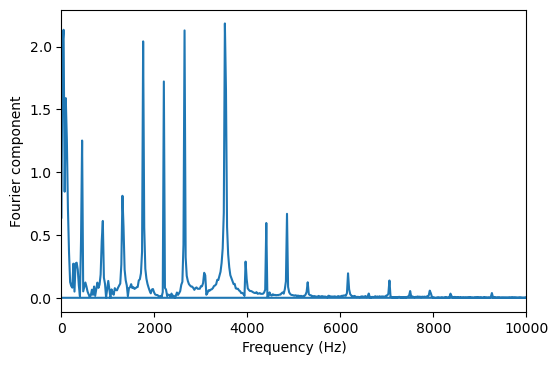

In [52]:
f2 = plt.figure(2)
plt.plot(freq, Y_abs)

plt.ylabel('Fourier component')
plt.xlabel('Frequency (Hz)')
plt.xlim([0.0, 10000])

plt.show()

This looks like the frequency spectrum of a musical instrument indeed. It has many higher harmonics. Let's focus our attention to the region between 300 and 600Hz, and see if we can find the 440 Hz frequency there.

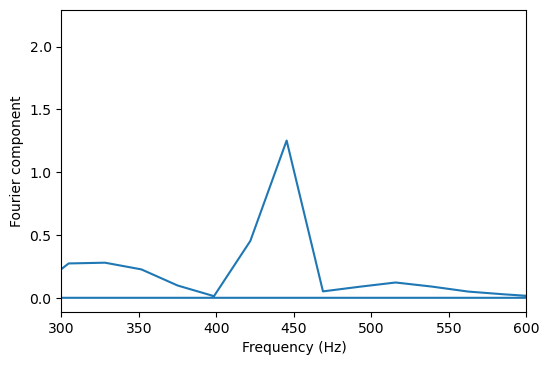

In [56]:
f3 = plt.figure(3)
plt.plot(freq, Y_abs)

plt.ylabel('Fourier component')
plt.xlabel('Frequency (Hz)')
plt.xlim([300, 600])

plt.show()

Indeed we have this peak, it is close to 440Hz.